# **Players K-Modes**

## Preparation

In [0]:
# just run this chunk of code and follow the prompt that it spits out
# install PyDrive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Install kmodes package
pip install kmodes

In [0]:
# import packages
import warnings
import numpy as np
import pandas as pd
import scipy
import scipy.stats as st
import statsmodels as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
import plotly
import plotly.graph_objs as go
from kmodes.kmodes import KModes

In [0]:
# Data importing
# Players file
link = 'https://drive.google.com/open?id=1LZsFQ4jbhwzXRUcVcE1UDRJERa8PCawB'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Players.csv')  
players_df = pd.read_csv('Players.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



### Select the categorical variables

In [0]:
# Take all the categorical variables and make them as category
for col in [
    'position',
    'champion',
    'ban1',
    'ban2',
    'ban3',
    'ChampType'
]:
    players_df[col] = players_df[col].astype('category')

### Select the numerical variables

In [0]:
# Drop the columns that won't be taken as considerations
players_df = players_df.drop(['playerid', 'gameid', 'league', 'k', 'd', 'a', 'doubles', 'triples', 'quadras', 'pentas',
                             'fb', 'fbassist', 'fbtime', 'wardkills', 'visionwards', 'visionwardbuys', 
                             'monsterkills', 'monsterkillsownjungle', 'goldat10', 'goldat15', 'xpat10'], axis = 1)

In [0]:
# Get all existing numerical data
players_num = players_df.iloc[:, [6, 7, 8, 9]]
players_num.describe()

,dmgtochamps,wards,goldspent,minionkills
count,60180.000000,60180.000000,60180.000000,60180.000000
mean,13123.412031,26.021386,11561.820422,193.239299
std,9178.133515,18.191291,3662.864974,136.381235
min,231.000000,1.000000,3025.000000,0.000000
25%,6378.500000,14.000000,8950.000000,45.000000
50%,11078.000000,19.000000,11185.000000,228.000000
75%,17395.000000,33.000000,13700.000000,301.000000
max,121937.000000,199.000000,70001.000000,1373.000000


In [0]:
# Make bins to each numercial variable and mark them into several ranges
# For column 'dmgtochamps'
dmgbins = [0, 6378.5, 11078, 17395, 121937]
dmgnames = ['lowdmg', 'lowmiddmg', 'midhighdmg', 'highdmg']

players_df['dmgRange'] = pd.cut(players_df['dmgtochamps'], dmgbins, labels = dmgnames)

# For column 'wards'
wardsbins = [0, 14, 19, 33, 199]
wardsnames = ['fewwards', 'lesswards', 'morewards', 'mostwards']

players_df['wardsRange'] = pd.cut(players_df['wards'], wardsbins, labels = wardsnames)

# For column 'goldspent'
goldspentbins = [0, 8950, 11185, 13700, 70001]
goldspentnames = ['fewgoldspent', 'lessgoldspent', 'moregoldspent', 'mostgoldspent']

players_df['goldspentRange'] = pd.cut(players_df['goldspent'], goldspentbins, labels = goldspentnames)

# For column 'minionkills'
minionkillsbins = [-2, 45, 228, 301, 1373]
minionkillsnames = ['fewkills', 'lesskills', 'morekills', 'mostkills']

players_df['minionkillsRange'] = pd.cut(players_df['minionkills'], minionkillsbins, labels = minionkillsnames)

In [0]:
# Drop all the numerical variables and get dummy variables for all categorical parameters
players = players_df.drop(['dmgtochamps','wards', 'goldspent', 'minionkills'], axis = 1)
win = players[players['result'] == 1]
lose = players[players['result'] == 0]

## Separation of Data

#### *Separation of Winning and Losing Players*

In [0]:
# Drop the result first and reset the index
players_win = win.drop(['result'], axis = 1)
players_win = players_win.reset_index(drop = True)

In [0]:
# Drop the result first and reset the index
players_lose = lose.drop(['result'], axis = 1)
players_lose = players_lose.reset_index(drop = True)

#### *Separation of Train and Holdout*

In [0]:
# Split the data to train and test (stratifying at players' position)
players_win_train, players_win_test= train_test_split(players_win, test_size=0.3, 
                                                      random_state=23, 
                                                      stratify=players_win['position'])
players_lose_train, players_lose_test= train_test_split(players_lose, test_size=0.3, 
                                                        random_state=23, 
                                                        stratify=players_lose['position'])

## Apply K-Modes

### *K-Modes for Winning Train Data*

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4017, cost: 161795.0
Run 1, iteration: 2/100, moves: 236, cost: 161795.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4160, cost: 148094.0
Run 1, iteration: 2/100, moves: 73, cost: 148094.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5329, cost: 138494.0
Run 1, iteration: 2/100, moves: 1927, cost: 136838.0
Run 1, iteration: 3/100, moves: 1628, cost: 136175.0
Run 1, iteration: 4/100, moves: 396, cost: 136175.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6477, cost: 134103.0
Run 1, iteration: 2/100, moves: 215, cost: 134103.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5365, cost: 131662.0
Run 1, iteration: 2/10

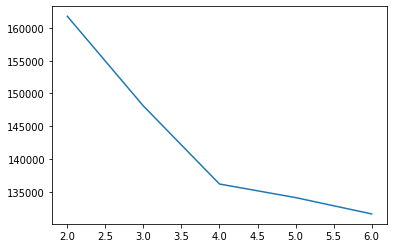

In [0]:
# find the optimal clusters for kmodes winning by reducing clustering cost, defined as the sum distance of all points to their respective cluster centroid
cost = []
for i in list(range(2,7)):
    kmode_huang_win_train = KModes(n_clusters=i, init = "Huang", n_init = 1, verbose=1)
    kmode_huang_win_train.fit_predict(players_win_train)
    cost.append(kmode_huang_win_train.cost_)

costscore_win = np.array([i for i in range(2,7)])
plt.plot(costscore_win,cost)

In [0]:
# Based on the 'elbow' point, we should choose n_cluster = 4
km_huang_win_train = KModes(n_clusters=4, init = "Huang", n_init = 1, verbose=1)
kmhuang_playerswin_train_fit = km_huang_win_train.fit(players_win_train)
kmhuang_playerswin_train_predict = kmhuang_playerswin_train_fit.predict(players_win_train)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6554, cost: 140662.0
Run 1, iteration: 2/100, moves: 4427, cost: 138204.0
Run 1, iteration: 3/100, moves: 605, cost: 138204.0


In [0]:
# Combine the predicted cluster with the original data
kmhuang_clusters_win_train = pd.DataFrame(kmhuang_playerswin_train_predict)
kmhuang_clusters_win_train.columns = ['cluster_predicted']
players_kmclusters_win_train = pd.concat([players_win_train, kmhuang_clusters_win_train], axis = 1).reset_index()
players_kmclusters_win_train = players_kmclusters_win_train.drop(['index'], axis = 1)

In [0]:
# Separate all data into 4 different clusters
cluster0 = players_kmclusters_win_train[players_kmclusters_win_train['cluster_predicted'] == 0]
cluster1 = players_kmclusters_win_train[players_kmclusters_win_train['cluster_predicted'] == 1]
cluster2 = players_kmclusters_win_train[players_kmclusters_win_train['cluster_predicted'] == 2]
cluster3 = players_kmclusters_win_train[players_kmclusters_win_train['cluster_predicted'] == 3]

players_win_train_ccenters = pd.DataFrame(km_huang_win_train.cluster_centroids_,
                                         columns=players_win_train.columns)
players_win_train_ccenters.T

,0,1,2,3
position,ADC,Jungle,Middle,Support
champion,Ezreal,Sejuani,Taliyah,Braum
ban1,LeBlanc,Zac,Taliyah,LeBlanc
ban2,Galio,Caitlyn,Camille,Camille
ban3,Camille,Kalista,Galio,Camille
ChampType,17,26,11,25
dmgRange,highdmg,midhighdmg,lowmiddmg,lowdmg
wardsRange,lesswards,morewards,fewwards,mostwards
goldspentRange,mostgoldspent,moregoldspent,lessgoldspent,fewgoldspent
minionkillsRange,mostkills,fewkills,morekills,fewkills


### *K-Modes for Winning Holdout Data*

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2191, cost: 68454.0
Run 1, iteration: 2/100, moves: 104, cost: 68454.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1668, cost: 63111.0
Run 1, iteration: 2/100, moves: 730, cost: 62962.0
Run 1, iteration: 3/100, moves: 50, cost: 62962.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2914, cost: 58085.0
Run 1, iteration: 2/100, moves: 865, cost: 58085.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3065, cost: 56875.0
Run 1, iteration: 2/100, moves: 983, cost: 56734.0
Run 1, iteration: 3/100, moves: 269, cost: 56734.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2120, cost: 55965.0
Run 1, iteration: 2/100, moves: 545

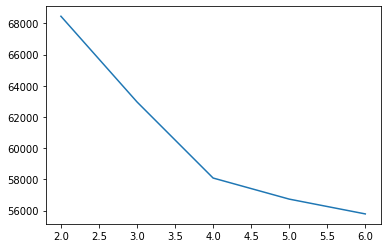

In [0]:
# find the optimal clusters for kmodes winning by reducing clustering cost, defined as the sum distance of all points to their respective cluster centroid
cost = []
for i in list(range(2,7)):
    kmode_huang_win_test = KModes(n_clusters=i, init = "Huang", n_init = 1, verbose=1)
    kmode_huang_win_test.fit_predict(players_win_test)
    cost.append(kmode_huang_win_test.cost_)

costscore_win = np.array([i for i in range(2,7)])
plt.plot(costscore_win,cost)

In [0]:
# Based on the 'elbow' point, we should choose n_cluster = 4
km_huang_win_test = KModes(n_clusters=4, init = "Huang", n_init = 1, verbose=1)
kmhuang_playerswin_test_fit = km_huang_win_test.fit_predict(players_win_test)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2872, cost: 59468.0
Run 1, iteration: 2/100, moves: 1117, cost: 59468.0


In [0]:
# Combine the predicted cluster with the original data
kmhuang_clusters_win_test = pd.DataFrame(kmhuang_playerswin_test_fit)
kmhuang_clusters_win_test.columns = ['cluster_predicted']
players_kmclusters_win_test = pd.concat([players_win_test, kmhuang_clusters_win_test], axis = 1).reset_index()
players_kmclusters_win_test = players_kmclusters_win_test.drop(['index'], axis = 1)

In [0]:
# Separate all data into 4 different clusters
cluster0 = players_kmclusters_win_test[players_kmclusters_win_test['cluster_predicted'] == 0]
cluster1 = players_kmclusters_win_test[players_kmclusters_win_test['cluster_predicted'] == 1]
cluster2 = players_kmclusters_win_test[players_kmclusters_win_test['cluster_predicted'] == 2]
cluster3 = players_kmclusters_win_test[players_kmclusters_win_test['cluster_predicted'] == 3]


players_win_test_ccenters = pd.DataFrame(km_huang_win_test.cluster_centroids_,
                                         columns=players_win_test.columns)
players_win_test_ccenters.T

,0,1,2,3
position,Middle,Top,ADC,Support
champion,Xayah,Jarvan IV,Ezreal,Braum
ban1,LeBlanc,Camille,Taliyah,LeBlanc
ban2,Galio,Rakan,Aatrox,Camille
ban3,Caitlyn,Kalista,Camille,Galio
ChampType,17,26,20,25
dmgRange,midhighdmg,highdmg,highdmg,lowdmg
wardsRange,fewwards,morewards,fewwards,mostwards
goldspentRange,moregoldspent,mostgoldspent,mostgoldspent,fewgoldspent
minionkillsRange,morekills,mostkills,mostkills,fewkills


In [0]:
size_win_train = pd.DataFrame({'clusters': ['cluster0', 'cluster1', 'cluster2', 'cluster3'],
             'size': [len(players_kmclusters_win_train[players_kmclusters_win_train['cluster_predicted'] == 0])/len(players_kmclusters_win_train),
                      len(players_kmclusters_win_train[players_kmclusters_win_train['cluster_predicted'] == 1])/len(players_kmclusters_win_train),
                      len(players_kmclusters_win_train[players_kmclusters_win_train['cluster_predicted'] == 2])/len(players_kmclusters_win_train),
                      len(players_kmclusters_win_train[players_kmclusters_win_train['cluster_predicted'] == 3])/len(players_kmclusters_win_train),]           
             })

size_win_test = pd.DataFrame({'clusters': ['cluster0', 'cluster1', 'cluster2', 'cluster3'],
             'size': [len(players_kmclusters_win_test[players_kmclusters_win_test['cluster_predicted'] == 0])/len(players_kmclusters_win_test),
                      len(players_kmclusters_win_test[players_kmclusters_win_test['cluster_predicted'] == 1])/len(players_kmclusters_win_test),
                      len(players_kmclusters_win_test[players_kmclusters_win_test['cluster_predicted'] == 2])/len(players_kmclusters_win_test),
                      len(players_kmclusters_win_test[players_kmclusters_win_test['cluster_predicted'] == 3])/len(players_kmclusters_win_test)]           
             })

display(size_win_train, size_win_test)

,clusters,size
0,cluster0,0.278296
1,cluster1,0.191203
2,cluster2,0.139898
3,cluster3,0.161379


,clusters,size
0,cluster0,0.213906
1,cluster1,0.131275
2,cluster2,0.077507
3,cluster3,0.162797


### *K-Modes for Losing Train Data*

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5359, cost: 156999.0
Run 1, iteration: 2/100, moves: 3209, cost: 156459.0
Run 1, iteration: 3/100, moves: 5, cost: 156459.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3871, cost: 142747.0
Run 1, iteration: 2/100, moves: 312, cost: 142747.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6679, cost: 140347.0
Run 1, iteration: 2/100, moves: 643, cost: 140347.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3582, cost: 134893.0
Run 1, iteration: 2/100, moves: 3, cost: 134893.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5684, cost: 133963.0
Run 1, iteration: 2/100, moves: 1754, cost: 133683.0
Run 1, iteration: 3/100, 

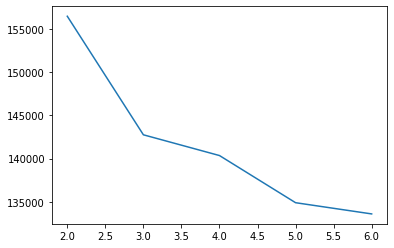

In [0]:
# find the optimal clusters for kmodes losing by reducing clustering cost, defined as the sum distance of all points to their respective cluster centroid
cost = []
for i in list(range(2,7)):
    kmode_huang_lose_train = KModes(n_clusters=i, init = "Huang", n_init = 1, verbose=1)
    kmode_huang_lose_train.fit_predict(players_lose_train)
    cost.append(kmode_huang_lose_train.cost_)

costscore_win = np.array([i for i in range(2,7)])
plt.plot(costscore_win,cost)

In [0]:
# Based on the 'elbow' point, we should choose n_cluster = 5
km_huang_lose_train = KModes(n_clusters=5, init = "Huang", n_init = 1, verbose=1)
kmhuang_playerslose_train_fit = km_huang_lose_train.fit(players_lose_train)
kmhuang_playerslose_train_predict = kmhuang_playerslose_train_fit.predict(players_lose_train)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5907, cost: 135122.0
Run 1, iteration: 2/100, moves: 445, cost: 135072.0
Run 1, iteration: 3/100, moves: 22, cost: 135072.0


In [0]:
# Combine the predicted cluster with the original data
kmhuang_clusters_lose_train = pd.DataFrame(kmhuang_playerslose_train_predict)
kmhuang_clusters_lose_train.columns = ['cluster_predicted']
players_kmclusters_lose_train = pd.concat([players_lose_train, kmhuang_clusters_lose_train], axis = 1).reset_index()
players_kmclusters_lose_train = players_kmclusters_lose_train.drop(['index'], axis = 1)

In [0]:
# Separate all data into 5 different clusters
cluster0 = players_kmclusters_lose_train[players_kmclusters_lose_train['cluster_predicted'] == 0]
cluster1 = players_kmclusters_lose_train[players_kmclusters_lose_train['cluster_predicted'] == 1]
cluster2 = players_kmclusters_lose_train[players_kmclusters_lose_train['cluster_predicted'] == 2]
cluster3 = players_kmclusters_lose_train[players_kmclusters_lose_train['cluster_predicted'] == 3]
cluster4 = players_kmclusters_lose_train[players_kmclusters_lose_train['cluster_predicted'] == 4]

players_lose_train_ccenters = pd.DataFrame(km_huang_lose_train.cluster_centroids_,
                                         columns=players_lose_train.columns)
players_lose_train_ccenters.T

,0,1,2,3,4
position,Top,Middle,Support,Jungle,Middle
champion,Varus,Ryze,Braum,Sejuani,Varus
ban1,Zac,Zoe,Aatrox,Zac,Aatrox
ban2,LeBlanc,Camille,Rakan,Galio,Galio
ban3,Galio,LeBlanc,Camille,Kalista,Camille
ChampType,17,13,25,26,17
dmgRange,highdmg,highdmg,lowdmg,lowdmg,midhighdmg
wardsRange,morewards,lesswards,mostwards,mostwards,fewwards
goldspentRange,mostgoldspent,moregoldspent,fewgoldspent,lessgoldspent,lessgoldspent
minionkillsRange,mostkills,mostkills,lesskills,fewkills,morekills


### *K-Modes for Losing Holdout Data*

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1911, cost: 68690.0
Run 1, iteration: 2/100, moves: 368, cost: 68492.0
Run 1, iteration: 3/100, moves: 110, cost: 68492.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1456, cost: 62635.0
Run 1, iteration: 2/100, moves: 332, cost: 62635.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3180, cost: 60187.0
Run 1, iteration: 2/100, moves: 1636, cost: 59475.0
Run 1, iteration: 3/100, moves: 309, cost: 59475.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2003, cost: 58596.0
Run 1, iteration: 2/100, moves: 92, cost: 58596.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2588, cost: 57840.0
Run 1, iteration: 2/100, moves: 19

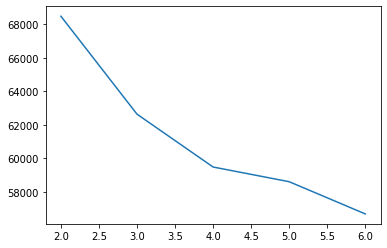

In [0]:
cost = []
for i in list(range(2,7)):
    kmode_huang_lose_test = KModes(n_clusters=i, init = "Huang", n_init = 1, verbose=1)
    kmode_huang_lose_test.fit_predict(players_lose_test)
    cost.append(kmode_huang_lose_test.cost_)

costscore_win = np.array([i for i in range(2,7)])
plt.plot(costscore_win,cost)

In [0]:
# Based on the 'elbow' point, we should choose n_cluster = 5
km_huang_lose_test = KModes(n_clusters=5, init = "Huang", n_init = 1, verbose=1)
kmhuang_playerslose_test_fit = km_huang_lose_test.fit_predict(players_lose_test)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3400, cost: 57301.0
Run 1, iteration: 2/100, moves: 1014, cost: 57043.0
Run 1, iteration: 3/100, moves: 142, cost: 57043.0


In [0]:
# Combine the predicted cluster with the original data
kmhuang_clusters_lose_test = pd.DataFrame(kmhuang_playerslose_test_fit)
kmhuang_clusters_lose_test.columns = ['cluster_predicted']
players_kmclusters_lose_test = pd.concat([players_lose_test, kmhuang_clusters_lose_test], axis = 1).reset_index()
players_kmclusters_lose_test = players_kmclusters_lose_test.drop(['index'], axis = 1)

In [0]:
# Separate all data into 5 different clusters
cluster0 = players_kmclusters_lose_test[players_kmclusters_lose_test['cluster_predicted'] == 0]
cluster1 = players_kmclusters_lose_test[players_kmclusters_lose_test['cluster_predicted'] == 1]
cluster2 = players_kmclusters_lose_test[players_kmclusters_lose_test['cluster_predicted'] == 2]
cluster3 = players_kmclusters_lose_test[players_kmclusters_lose_test['cluster_predicted'] == 3]
cluster4 = players_kmclusters_lose_test[players_kmclusters_lose_test['cluster_predicted'] == 4]

players_lose_test_ccenters = pd.DataFrame(km_huang_lose_test.cluster_centroids_,
                                         columns=players_lose_test.columns)
players_lose_test_ccenters.T

,0,1,2,3,4
position,Middle,Support,ADC,ADC,Jungle
champion,Ryze,Braum,Varus,Ezreal,Sejuani
ban1,LeBlanc,Zac,Aatrox,Zac,Aatrox
ban2,Camille,Galio,Galio,Galio,Rakan
ban3,Galio,Galio,Camille,Ryze,Camille
ChampType,15,25,20,17,26
dmgRange,lowmiddmg,lowdmg,lowmiddmg,highdmg,lowdmg
wardsRange,lesswards,mostwards,fewwards,morewards,morewards
goldspentRange,lessgoldspent,fewgoldspent,moregoldspent,mostgoldspent,fewgoldspent
minionkillsRange,morekills,lesskills,morekills,mostkills,fewkills


In [0]:
size_lose_train = pd.DataFrame({'clusters': ['cluster0', 'cluster1', 'cluster2', 'cluster3','cluster4'],
             'size': [len(players_kmclusters_lose_train[players_kmclusters_lose_train['cluster_predicted'] == 0])/len(players_kmclusters_lose_train),
                      len(players_kmclusters_lose_train[players_kmclusters_lose_train['cluster_predicted'] == 1])/len(players_kmclusters_lose_train),
                      len(players_kmclusters_lose_train[players_kmclusters_lose_train['cluster_predicted'] == 2])/len(players_kmclusters_lose_train),
                      len(players_kmclusters_lose_train[players_kmclusters_lose_train['cluster_predicted'] == 3])/len(players_kmclusters_lose_train),
                      len(players_kmclusters_lose_train[players_kmclusters_lose_train['cluster_predicted'] == 4])/len(players_kmclusters_lose_train)]           
             })

size_lose_test = pd.DataFrame({'clusters': ['cluster0', 'cluster1', 'cluster2', 'cluster3','cluster4'],
             'size': [len(players_kmclusters_lose_test[players_kmclusters_lose_test['cluster_predicted'] == 0])/len(players_kmclusters_lose_test),
                      len(players_kmclusters_lose_test[players_kmclusters_lose_test['cluster_predicted'] == 1])/len(players_kmclusters_lose_test),
                      len(players_kmclusters_lose_test[players_kmclusters_lose_test['cluster_predicted'] == 2])/len(players_kmclusters_lose_test),
                      len(players_kmclusters_lose_test[players_kmclusters_lose_test['cluster_predicted'] == 3])/len(players_kmclusters_lose_test),
                      len(players_kmclusters_lose_test[players_kmclusters_lose_test['cluster_predicted'] == 4])/len(players_kmclusters_lose_test)]           
             })

display(size_lose_train, size_lose_test)

,clusters,size
0,cluster0,0.173162
1,cluster1,0.107952
2,cluster2,0.204011
3,cluster3,0.137410
4,cluster4,0.148242


,clusters,size
0,cluster0,0.149955
1,cluster1,0.140161
2,cluster2,0.098002
3,cluster3,0.105591
4,cluster4,0.091776


## Summary
### *For Winning Team:*
2 out 4 clusters are quite consistent between train and test, which are positions ADC and Support. The associated damage range, minionkillsRange and goldspentRange are exactly the same too for those 2 positions. The difference is in the wards range and champion type for ADC. This might've been caused by the sampling.

### *For Losing Team:*
Only 2 out of 5 clusters are consistent between train and test. Those two are Jungle & Support. The associated champion types, dmgrange, wardsrange, and minionkillsrange are exactly the same. The difference is the goldspentRange for Jungle, where lessgoldspent is needed for train while only fewgoldspent  for test. 

Thus, K-Modes might not be the best to analyze positions strategies (gold/minion/wards) as it's not consistent, but it's good enough to find the clustering of position and champion types.
